In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn

In [51]:
df_in = pd.read_csv('../data/sobol_params.csv')
X = df_in.to_numpy()

In [52]:
df_out = pd.read_csv('../data/sobol_output.csv')
Y = df_out.to_numpy()

In [53]:
seed = 1234

In [54]:
param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega']
param_bounds = [[-3., -2.], [0.1, 1.], [0.1, 1.], [-1.6, -0.8], [0.1, 0.3]]
problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
    } 

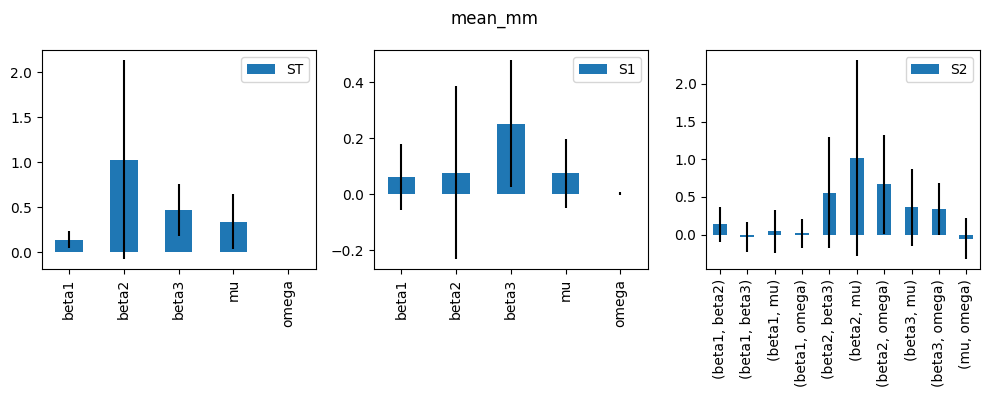

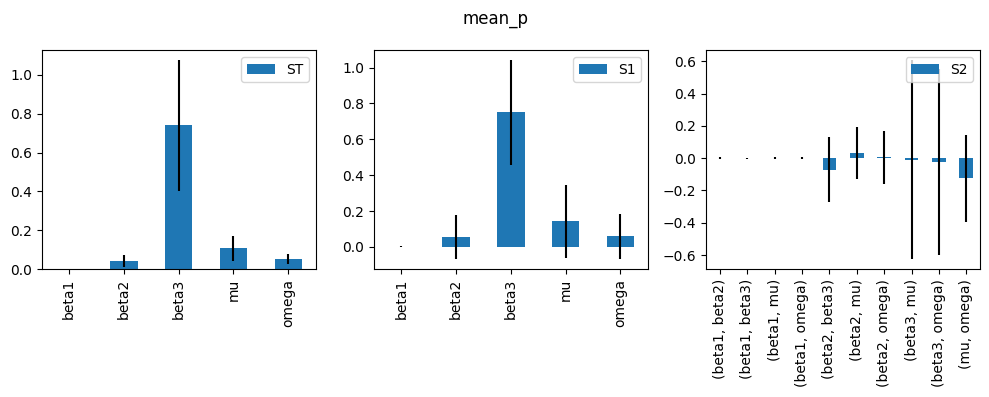

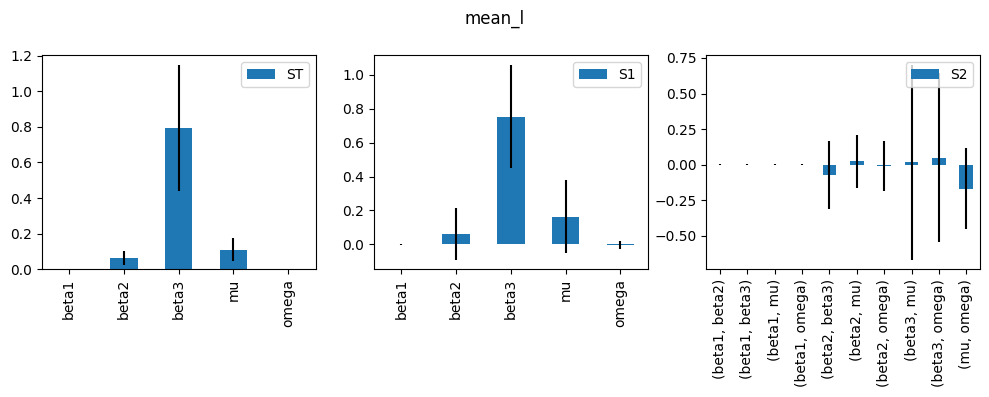

In [55]:
# dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
dep_vars = ['mean_mm', 'mean_p', 'mean_l']

for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.savefig('sen.pdf')
    plt.show()

# Si_sobol = sobol.analyze(
#                         problem, 
#                         Y[:, 0], 
#                         calc_second_order=True, 
#                         print_to_console=False, 
#                         seed=1234
#                     )
    
# fig_l = Si_sobol.plot()
# fig.set_size_inches(10, 4)
# fig.suptitle(f'{name}')
# plt.tight_layout()
# plt.savefig('sensitivity_l.pdf')
# plt.show()



TypeError: 'Axes' object is not subscriptable

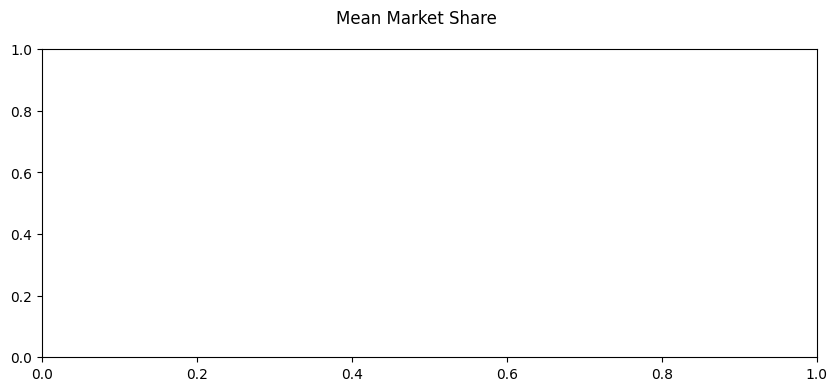

In [56]:
from matplotlib.backends.backend_pdf import PdfPages

dep_vars = ['Mean Market Share', 'Mean Price', 'Mean Labor']
pdf_path = 'plots.pdf'

with PdfPages(pdf_path) as pdf:
    for i, name in enumerate(dep_vars):
        Si_sobol = sobol.analyze(problem, Y[:, i], calc_second_order=True, print_to_console=False, seed=1234)
    
        fig, axes = plt.subplots()
        fig.set_size_inches(10, 4)
        fig.suptitle(name)
        
        Si_sobol.plot(ax=axes)
        plt.tight_layout()
        
        pdf.savefig(fig)
        plt.close(fig)

print(f"Plots saved to '{pdf_path}'")

        minimum      mean    median   maximum        CV
beta1  0.094494  0.204067  0.195747  0.401910  0.441556
beta2  0.085938  0.191146  0.188182  0.288194  0.360173
beta3  0.145089  0.313653  0.293465  0.656250  0.462227
mu     0.097098  0.203596  0.152406  0.500372  0.644108
omega  0.105903  0.325446  0.285156  0.605035  0.383942


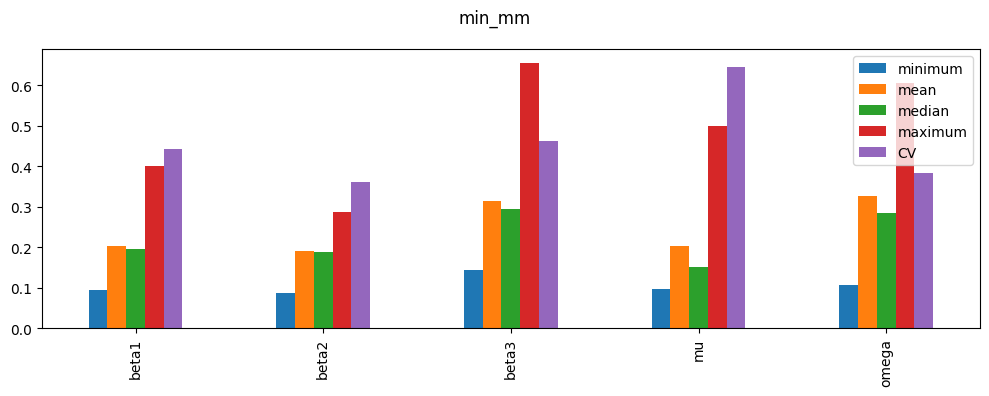

        minimum      mean    median   maximum        CV
beta1  0.087674  0.211669  0.205729  0.394965  0.494765
beta2  0.094618  0.194296  0.190848  0.294271  0.352580
beta3  0.120660  0.289199  0.247830  0.592014  0.486063
mu     0.129340  0.222458  0.180928  0.453497  0.509658
omega  0.098958  0.358904  0.342014  0.682292  0.407191


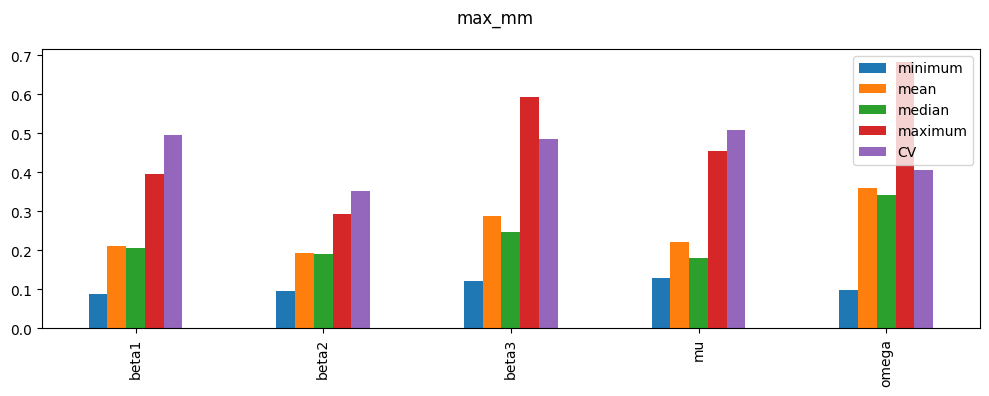

        minimum      mean    median   maximum        CV
beta1  0.093378  0.204303  0.195747  0.400174  0.439912
beta2  0.085938  0.191406  0.188182  0.293403  0.364196
beta3  0.145089  0.312872  0.293465  0.653646  0.461975
mu     0.097098  0.204117  0.152406  0.500372  0.639157
omega  0.105903  0.325967  0.286458  0.605035  0.383638


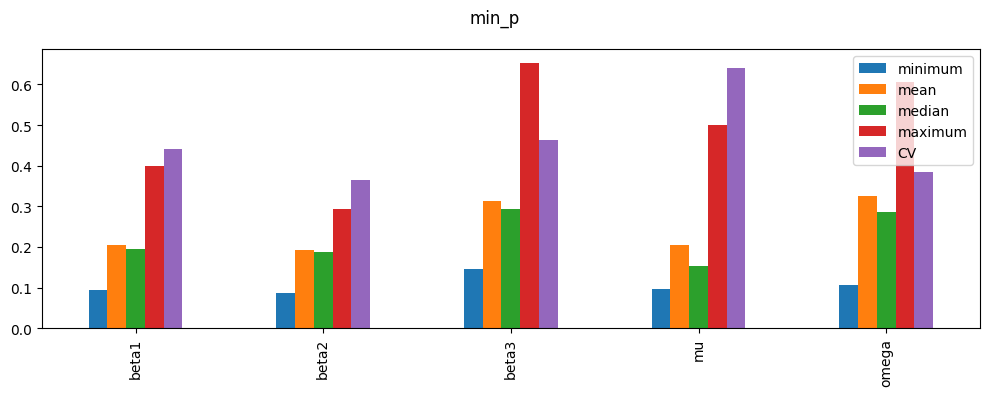

IndexError: index 3 is out of bounds for axis 1 with size 3

In [ ]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_pawn = pawn.analyze(problem, X, Y[:,i], print_to_console=True)
    
    axes = Si_pawn.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()

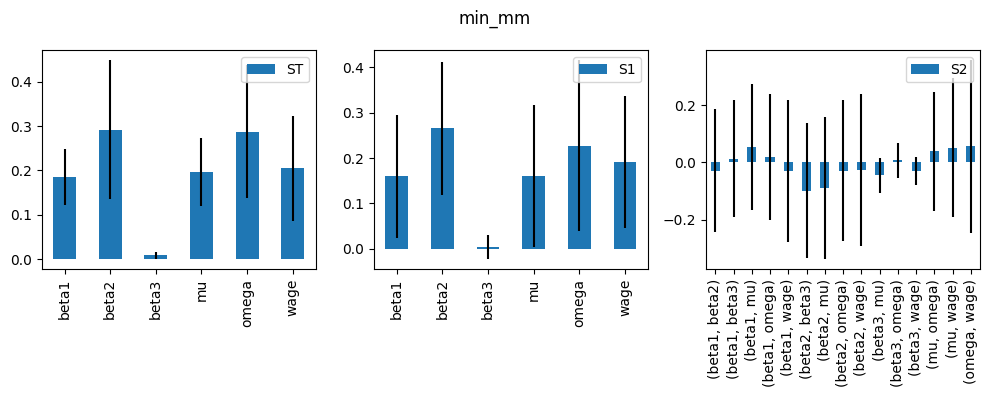

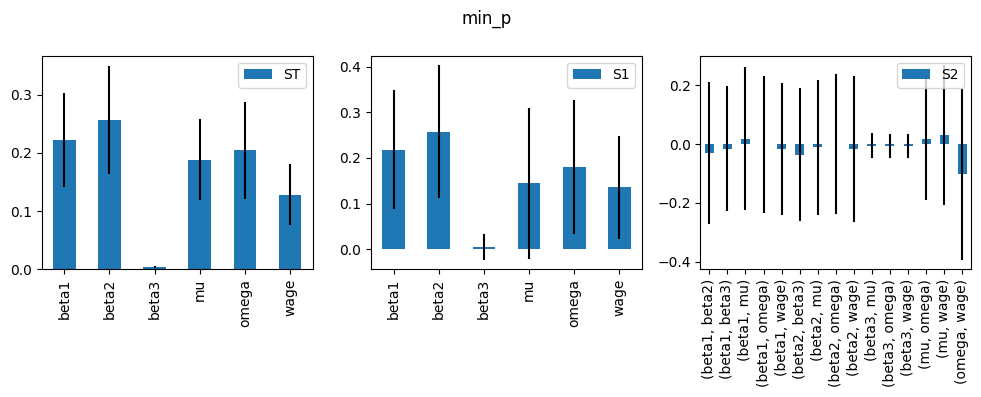

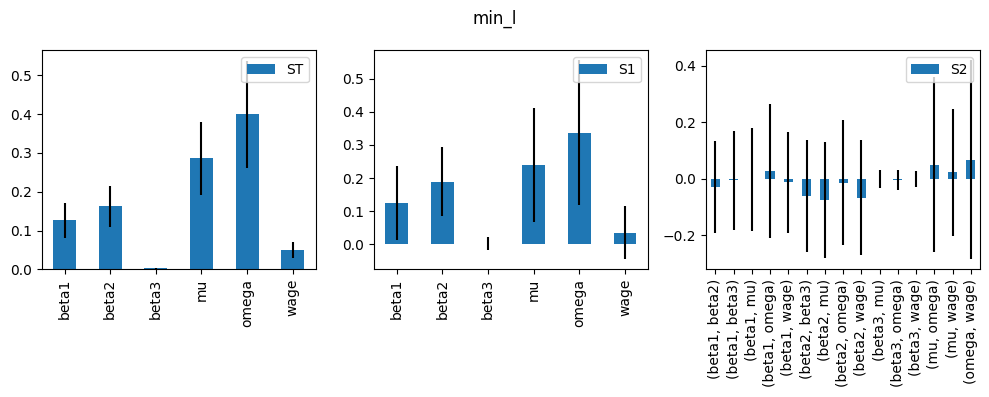

In [ ]:
dep_vars = ['min_mm', 'min_p', 'min_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()